# Analysis of Covid Cases in India

In [ ]:
# Importing necessary libraries and Confirmed cases dataset
import numpy as np
import pandas as pd
df=pd.read_csv('time_series_covid19_confirmed_global (2).csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50


In [ ]:
# Checking Confirmed Cases Data particularly for India 
df[df['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,6725,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,70768,74292,78055,81997,85784,90648,95698,100328


In [ ]:
# Importing the deaths and recovery datasets
df_d=pd.read_csv('time_series_covid19_deaths_global (1).csv')
df_r=pd.read_csv('time_series_covid19_recovered_global (1).csv')

In [ ]:
# checking death data particularly for India
df_d[df_d['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,226,246,288,331,358,393,405,448,486,521,559,592,645,681,721,780,825,881,939,1008,1079,1154,1223,1323,1391,1566,1693,1785,1889,1985,2101,2212,2294,2415,2551,2649,2753,2871,3025,3156


In [ ]:
# Checking Recovery Data Particularly for India
df_r[df_r['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
125,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,...,620,774,969,1080,1181,1359,1432,1768,2041,2463,2854,3273,3975,4370,5012,5498,5939,6523,7137,7747,8437,9068,10007,10819,11775,12847,14142,15331,16776,17887,19301,20969,22549,24420,26400,27969,30258,34224,36795,39233


# Plotting the Overall Trend of Growth of Confirmed, Recovered and Death Cases

In [ ]:
df1=df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df1.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [ ]:
df_d1=df_d.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df_d1.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [ ]:
df_r1=df_r.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df_r1.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [ ]:
one=df1[df1['Country/Region']=='India'][['variable','value']]
two=df_d1[df_d1['Country/Region']=='India'][['value']]
three=df_r1[df_r1['Country/Region']=='India'][['value']]

In [ ]:
two.rename(columns={'value':'value_d'},inplace=True)
three.rename(columns={'value':'value_r'},inplace=True)

In [ ]:
one.head()

,variable,value
131,1/22/20,0
397,1/23/20,0
663,1/24/20,0
929,1/25/20,0
1195,1/26/20,0


In [ ]:
one.reset_index(inplace=True)
two.reset_index(inplace=True)
three.reset_index(inplace=True)

In [ ]:
ind_m=pd.concat([one,two,three],axis=1)
ind_m.head()

,index,variable,value,index,value_d,index,value_r
0,131,1/22/20,0,131,0,125,0
1,397,1/23/20,0,397,0,378,0
2,663,1/24/20,0,663,0,631,0
3,929,1/25/20,0,929,0,884,0
4,1195,1/26/20,0,1195,0,1137,0


In [ ]:
!pip install pandas-bokeh

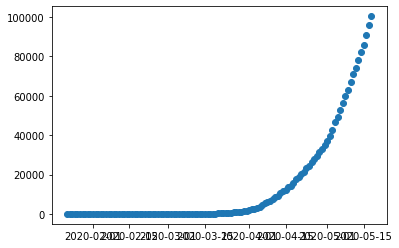

In [ ]:
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_file("Interactive Plot.html")
pd.plotting.output_notebook()
plt.scatter(ind_m['variable'],ind_m['value'])

In [ ]:
ind_m22=ind_m[['variable','value']]

In [ ]:
ind_m22.plot_bokeh(kind="scatter",figsize=(1200,400))

Figure(id='1765', ...)

In [ ]:
ind_m['variable']=pd.to_datetime(ind_m['variable'])

In [ ]:
# Plotting the Confirmed Cases over time
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind_m['variable'], y=ind_m['value'],
                    mode='lines+markers',
                   name='Positive Cases',line=dict(color='pink',width=3),marker=dict(color='red',size=8)))
fig.add_shape(
        # Line Horizontal
            type="line",
            x0='2020-03-31T00:00:00.000000000',
            y0=0,
            x1='2020-03-31T00:00:00.000000000',
            y1=ind_m['value'].max(),
            line=dict(
                color="Black",
                width=2,
                dash="dashdot",
            ),
    )




fig.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    ),annotations=[
        dict(
            y=60000,
            x='2020-04-06T00:00:00.000000000',
            xref="x",
            yref="y",
            text="Faster growth rate",
            showarrow=False,
            arrowhead=7,
            ax=0,
            ay=0
            
        )
    ])

fig.update_layout(template='plotly_white',title="Growth of COVID Infections over Time",
    xaxis_title="Date",
    yaxis_title="Number of Cases",font=dict(family="Franklin Gothic",size=15))
fig.show()


In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.models.widgets import Tabs, Panel
output_notebook()

In [ ]:
first=Panel(child=row(fig.show()),title='first')
second=Panel(child=row(fig1.show()),title='second')
tabs=Tabs(tabs=[first,second])

ValueError: ignored

The curve above shows the cases in India are growing in almost **exponential** fashion. The cases have crossed **100K** according to latest report as evident from the plot. After **31 March(marked by black line)**, the cases have started growing at a phenomenally high rate. 

In [ ]:
# Plotting the Death Cases over Time
import plotly.graph_objects as go
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=ind_m['variable'], y=ind_m['value_d'],
                    mode='lines+markers',name='Positive Cases',line=dict(color='pink',width=3),marker=dict(color='cyan',size=8)))

fig1.add_shape(
        # Line Horizontal
            type="line",
            x0='2020-03-31T00:00:00.000000000',
            y0=0,
            x1='2020-03-31T00:00:00.000000000',
            y1=ind_m['value_d'].max(),
            line=dict(
                color="Black",
                width=2,
                dash="dashdot",
            ),
    )


fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    ),annotations=[
        dict(
            y=2500,
            x='2020-04-06T00:00:00.000000000',
            xref="x",
            yref="y",
            text="Faster growth rate",
            showarrow=False,
            arrowhead=7,
            ax=0,
            ay=0
            
        )
    ])
fig1.update_layout(template='plotly_white',title="Growth of COVID Deaths over Time",
    xaxis_title="Date",
    yaxis_title="Number of Deaths",font=dict(family="Franklin Gothic",size=15))
fig1.show()
                   

As evident from the above plot,the number of death cases also follow **exponential growth** and growth rate becomes very high from **Mar 31st** as indicated by the black dashed line.

In [ ]:
# Growth of Recovery Cases over Time
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind_m['variable'], y=ind_m['value_r'],
                    mode='lines+markers',name='Positive Cases',line=dict(color='silver',width=3),marker=dict(color='gold',size=8)))

fig.add_shape(
        # Line Horizontal
            type="line",
            x0='2020-04-09T00:00:00.000000000',
            y0=0,
            x1='2020-04-09T00:00:00.000000000',
            y1=ind_m['value_r'].max(),
            line=dict(
                color="Black",
                width=2,
                dash="dashdot",
            ),
    )

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    ),annotations=[
        dict(
            y=30000,
            x='2020-04-15T00:00:00.000000000',
            xref="x",
            yref="y",
            text="Faster growth rate",
            showarrow=False,
            arrowhead=7,
            ax=0,
            ay=0
            
        )
    ])
fig.update_layout(template='plotly_white',title="Patients Recovered over Time",
    xaxis_title="Date",
    yaxis_title="Number of Recoveries",font=dict(family="Franklin Gothic",size=15))
fig.show()

Alike the above thwo curves, the recovery cases curve also follows close to an **exponential** pattern over time. After **9th April**, the cases the recovery rate start increases rapidly. 

This is good, because *higher the recovery rate, faster the infected patients will heal*.

In [ ]:
ind_m.head()

,index,variable,value,index,value_d,index,value_r,pos1,ded1,rec1
0,131,2020-01-22,0,131.0,0.0,125.0,0.0,0,0.0,0.0
1,397,2020-01-23,0,397.0,0.0,378.0,0.0,0,0.0,0.0
2,663,2020-01-24,0,663.0,0.0,631.0,0.0,0,0.0,0.0
3,929,2020-01-25,0,929.0,0.0,884.0,0.0,0,0.0,0.0
4,1195,2020-01-26,0,1195.0,0.0,1137.0,0.0,0,0.0,0.0


In [ ]:
pos1=[ind_m.loc[0,'value']]
for i in range(1,len(ind_m)):
  pos1.append(abs(ind_m.loc[i,'value']-ind_m.loc[i-1,'value']))
print(pos1)
ind_m['pos1']=pos1

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 23, 2, 1, 3, 5, 4, 13, 6, 11, 9, 20, 11, 6, 23, 14, 38, 50, 86, 66, 103, 37, 121, 70, 160, 100, 37, 227, 146, 601, 545, 24, 515, 506, 1190, 533, 605, 809, 873, 848, 759, 1248, 1034, 835, 1108, 922, 1370, 1893, 924, 1541, 1290, 1707, 1453, 1753, 1607, 1561, 1873, 1738, 1801, 2394, 2442, 2806, 3932, 2963, 3587, 3364, 3344, 3113, 4353, 3607, 3524, 3763, 3942, 3787, 4864, 5050, 4630]


In [ ]:
ded1=[ind_m.loc[0,'value_d']]
for i in range(1,len(ind_m)):
  ded1.append(abs(ind_m.loc[i,'value_d']-ind_m.loc[i-1,'value_d']))
print(ded1)
ind_m['ded1']=ded1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 3, 3, 0, 2, 8, 0, 4, 3, 5, 3, 23, 14, 0, 14, 13, 37, 14, 28, 48, 20, 42, 43, 27, 35, 12, 43, 38, 35, 38, 33, 53, 36, 40, 59, 45, 56, 58, 69, 71, 75, 69, 100, 68, 175, 127, 92, 104, 96, 116, 111, 82, 121, 136, 98, 104, 118, 154, 131]


In [ ]:
rec1=[ind_m.loc[0,'value_r']]
for i in range(1,len(ind_m)):
  rec1.append(abs(ind_m.loc[i,'value_r']-ind_m.loc[i-1,'value_r']))
print(rec1)
ind_m['rec1']=rec1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 1, 0, 1, 5, 3, 4, 0, 13, 3, 2, 28, 11, 11, 7, 21, 25, 43, 1, 37, 0, 146, 46, 85, 114, 154, 195, 111, 101, 178, 73, 336, 273, 422, 391, 419, 702, 395, 642, 486, 441, 584, 614, 610, 690, 631, 939, 812, 956, 1072, 1295, 1189, 1445, 1111, 1414, 1668, 1580, 1871, 1980, 1569, 2289, 3966, 2571, 2438]


In [ ]:
ind_m1=ind_m.copy()

In [ ]:
ind_m.tail()

,index,variable,value,index,value_d,index,value_r,pos1,ded1,rec1
113,30189,2020-05-14,81997,30189.0,2649.0,28714.0,27969.0,3942,98.0,1569.0
114,30455,2020-05-15,85784,30455.0,2753.0,28967.0,30258.0,3787,104.0,2289.0
115,30721,2020-05-16,90648,30721.0,2871.0,29220.0,34224.0,4864,118.0,3966.0
116,30987,2020-05-17,95698,30987.0,3025.0,29473.0,36795.0,5050,154.0,2571.0
117,31253,2020-05-18,100328,NaN,NaN,NaN,NaN,4630,NaN,NaN


In [ ]:
ind_m1.set_index('variable',inplace=True)

In [ ]:
ind_m1.tail()

,index,value,index,value_d,index,value_r,pos1,ded1,rec1
variable,,,,,,,,,
2020-05-14,30189,81997,30189,2649,28714,27969,3942,98,1569
2020-05-15,30455,85784,30455,2753,28967,30258,3787,104,2289
2020-05-16,30721,90648,30721,2871,29220,34224,4864,118,3966
2020-05-17,30987,95698,30987,3025,29473,36795,5050,154,2571
2020-05-18,31253,100328,31253,3156,29726,39233,4630,131,2438


In [ ]:
rex=ind_m1[['pos1','ded1','rec1']].resample('W').sum().reset_index()
rex.head()

,variable,pos1,ded1,rec1
0,2020-01-26,0,0,0
1,2020-02-02,2,0,0
2,2020-02-09,1,0,0
3,2020-02-16,0,0,3
4,2020-02-23,0,0,0


            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [ ]:
rex.tail()

,variable,pos1,ded1,rec1
13,2020-04-26,10275,322,3669
14,2020-05-03,14615,510,5252
15,2020-05-10,24656,821,9194
16,2020-05-17,28537,813,15826
17,2020-05-24,4630,131,2438


In [ ]:
rex=rex.iloc[:-1,:]

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=rex['variable'], y=rex['pos1'],
                    mode='lines+markers',
                   # name='positive_cases',line=dict(width=5,color='pink')))
                    name='positive_cases',marker=dict(size=15,color='orange', line=dict(width=4,
                                        color='DarkSlateGrey')),line=dict(width=5,color='deeppink')))

fig.update_layout(template='plotly_white',title="Total Covid Cases Weekly",
    xaxis_title="Date",
    yaxis_title="Number of Cases",font=dict(family="Franklin Gothic",size=15))
fig.show()

In above plot we take the **weekly summation of cases** in the above plot. On a particular day the number of tests might be high so more cases are caught while on the very next day due to any calamity (eg: *cyclone*) occurs and not much tests are done that day. So obviously less cases will be caught. To mitigate this abnormality/ deviation we aggregate the data weekly. 

So even if the count was abnormally higher/lower in a particular day, by taking **total count of 7 days for each observation** will mitigate that effect a lot. We see that as expected, the counts rise for each week. The **slope of the line** between any two marker/point will indicate the speed of rise(*higher slope results in more cases growth for that week compared to others*. Week of **May3 – May10** has very steep slope so very high number of cases recorded that week compared to other weeks.

**Note:** **Observe the x-axis carefully. The difference between two labels are of 14 days. So 2 weeks are shown between two labels. One week's data falls on the label while another week's data fall in middle of the the two labels.** *This is done to avoid the x-axis level looks messy.*

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=rex['variable'], y=rex['rec1'],
                    mode='lines+markers',
                    name='positive_cases',marker=dict(size=15,color='lightblue',line=dict(width=4,
                                        color='deepskyblue')),line=dict(width=5,color='darkblue')))
fig.update_layout(template='plotly_white',title="Total Covid Recovered Cases Weekly",
    xaxis_title="Date",
    yaxis_title="Number of Recovered Cases",font=dict(family="Franklin Gothic",size=15))
fig.show()

In the above plot, We also plot the total recovered cases weekly basis as done before and find that, as expected, **the number of cases rises as weeks pass by**. 

It is a positive/great thing also. *Higher slope of line between two markers indicate higher recovered patients for that week*. In the **last week(May10- May17)** the recovery cases are very high compared to others.

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=rex['variable'], y=rex['ded1'],
                    mode='lines+markers',
                    name='positive_cases',marker=dict(size=15,color='cyan',line=dict(width=4,
                                        color='darkolivegreen')),line=dict(width=5,color='lawngreen')))
fig.update_layout(template='plotly_white',title="Total Covid Death Cases Weekly",
    xaxis_title="Date",
    yaxis_title="Number of Deaths",font=dict(family="Franklin Gothic",size=15))
fig.show()

In above plot, **Weekly total cases of Death** are plotted. As seen above, death cases varies weekly. In most weeks the total cases **grows** although in few weeks they **decrease or remains almost constant**. 

Decreased or constant growth rate is what expected/ideal.

In [ ]:
ind_m.head()

,index,variable,value,index,value_d,index,value_r,pos1,ded1,rec1
0,131,2020-01-22,0,131.0,0.0,125.0,0.0,0,0.0,0.0
1,397,2020-01-23,0,397.0,0.0,378.0,0.0,0,0.0,0.0
2,663,2020-01-24,0,663.0,0.0,631.0,0.0,0,0.0,0.0
3,929,2020-01-25,0,929.0,0.0,884.0,0.0,0,0.0,0.0
4,1195,2020-01-26,0,1195.0,0.0,1137.0,0.0,0,0.0,0.0


In [ ]:
ind_m2=ind_m[['variable','value','value_r','value_d']]
ind_m2.rename(columns={'value':'Confirmed Cases','value_r':'Recovered Cases','value_d':'Death Cases'},inplace=True)
ind_m2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,variable,Confirmed Cases,Recovered Cases,Death Cases
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


In [ ]:
m3=ind_m2.melt(id_vars=['variable'],var_name='cats')
m3.head()

,variable,cats,value
0,2020-01-22,Confirmed Cases,0
1,2020-01-23,Confirmed Cases,0
2,2020-01-24,Confirmed Cases,0
3,2020-01-25,Confirmed Cases,0
4,2020-01-26,Confirmed Cases,0


In [ ]:
import plotly.express as px
fig = px.area(m3, x="variable", y="value", color="cats",template='plotly_white',color_discrete_map={"Confirmed Cases": "lightblue", "Recovered Cases": "darkgreen",'Death Cases':'red'}
	      )
fig.update_layout(template='plotly_white',title="Area Plot of Confirmed, Recovered & Death Cases over Time",
    xaxis_title="Date",
    yaxis_title="Number of Cases",font=dict(family="Franklin Gothic",size=15))
fig.show()

The above area plot gives on overall idea of the growth of positive, recovered and death cases over time.The purpose of the area plot is to visualize the growth *more easily and effectively* as it has shaded ***area-under-the-curve*** and also the compare each categories. 

As seen in the plot the area increases for all the categories so their numbers/counts increases quickly. 

The death counts are rising at a very **slow rate, almost negligible** compared to the other two, which is really a good thing. But still it is in positive growth phase.

*Legends in the interactive plot can be clicked to see individual categories separately.* 

In [ ]:
ind_m[ind_m['days']>=70]

KeyError: ignored

In [ ]:
ind_m[ind_m['days']<60]

,index,variable,value,index,value_d,index,value_r,days
0,131,2020-01-22,0,131.0,0.0,125.0,0.0,0
1,397,2020-01-23,0,397.0,0.0,378.0,0.0,1
2,663,2020-01-24,0,663.0,0.0,631.0,0.0,2
3,929,2020-01-25,0,929.0,0.0,884.0,0.0,3
4,1195,2020-01-26,0,1195.0,0.0,1137.0,0.0,4
5,1461,2020-01-27,0,1461.0,0.0,1390.0,0.0,5
6,1727,2020-01-28,0,1727.0,0.0,1643.0,0.0,6
7,1993,2020-01-29,0,1993.0,0.0,1896.0,0.0,7
8,2259,2020-01-30,1,2259.0,0.0,2149.0,0.0,8
9,2525,2020-01-31,1,2525.0,0.0,2402.0,0.0,9


In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,8))
x=np.sort(((ind_m['value'])/ind_m['value'].max())*100)
y=np.arange(1,len(x)+1)/len(x)
fig=go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='positive_cases',marker=dict(size=3,color='red')))
fig.add_shape(
        # Line Horizontal
            type="line",
            x0=1.991468,
            y0=0,
            x1=1.991468,
            y1=0.6016949,
            line=dict(
                color="Black",
                width=2,
                dash="dashdot",
            ),
    )

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=-15,
            y0=0.6016949,
            x1=1.991468,
            y1=0.6016949,
            line=dict(
                color="Black",
                width=2,
                dash="dashdot",
            ),
    )
fig.update_layout(
    annotations=[
        dict(
            y=0.58,
            x=5.311468,
            xref="x",
            yref="y",
            text="(1998,0.6)",
            showarrow=False,
            
            
        )
    ])
fig.update_layout(template='plotly_white',title="Empirical Cumulative Distribution Function(ECDF) Plot",
    xaxis_title="Percentage of Positive Cases",
    yaxis_title="ECDF",font=dict(family="Franklin Gothic",size=15))
fig.show()

The above plot is called **Empirical Cumulative Distribution Plot** or the **ECDF plot** in short. The y-axis represent percentile of days. (**Eg:** *0.6 means if there are 100 days recorded in total then we are talking about the 60th day.*) . **It gives a more detailed idea on how the cases are growing as the days passes.**

Consider the point on the red curve marked in black. It indicates that on the **first 60th percentile of the total number of days**(here there are total 118 days recorded so we are talking about first 71 days approx.) counted, only **1.99% **of total cases were found. So in the first few days the growth rate was minute. Then in the **last 40% percentile** of days the rest **98% cases** were recorded which clearly indicate a **drastic increase in growth rate. **

**So we can see more the red points are distanced away, the faster the cases grow.**

In [ ]:
pos1=[0]

for i in range(1,len(ind_m)):
  try:
    pos1.append((ind_m.loc[i,'value']-ind_m.loc[i-1,'value'])/(ind_m.loc[i-1,'value'])*100)
  except:
    pos1.append(0)
print(pos1)
#ind_m['pos1']=pos1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 100.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.66666666666666, 0.0, 459.99999999999994, 7.142857142857142, 3.3333333333333335, 9.67741935483871, 14.705882352941178, 10.256410256410255, 30.23255813953488, 10.714285714285714, 17.741935483870968, 12.32876712328767, 24.390243902439025, 10.784313725490197, 5.3097345132743365, 19.327731092436977, 9.859154929577464, 24.358974358974358, 25.773195876288657, 35.24590163934426, 20.0, 26.01010101010101, 7.414829659318638, 22.574626865671643, 10.6544901065449, 22.00825309491059, 11.273957158962796, 3.7487335359675784, 22.16796875, 11.670663469224621, 43.020758768790266, 27.27727727727728, 0.9437672040896579, 20.062329567588623, 16.417910447761194, 33.16610925306577, 11.155295102553369, 11.391451704010544, 13.674780256930358, 12.981412639405205, 11.160831797841537, 8.986502486384088, 13.557848995111351, 9.8918

In [ ]:
new_df=pd.DataFrame({'value':ind_m['value'],'perc_cornf':pos1})

In [ ]:

pd.set_option('display.max_rows', None)

In [ ]:
new_df

In [ ]:
rec1=[0]

for i in range(1,len(ind_m)):
  try:
    rec1.append((ind_m.loc[i,'value_r']-ind_m.loc[i-1,'value_r'])/(ind_m.loc[i-1,'value_r'])*100)
  except:
    rec1.append(0)
print(rec1)
#ind_m['pos1']=pos1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 225.0, 0.0, 7.6923076923076925, 0.0, 7.142857142857142, 33.33333333333333, 15.0, 17.391304347826086, 0.0, 48.148148148148145, 7.5, 4.651162790697675, 62.22222222222222, 15.068493150684931, 13.095238095238097, 7.368421052631578, 20.588235294117645, 20.32520325203252, 29.054054054054053, 0.5235602094240838, 19.270833333333336, 0.0, 63.75545851528385, 12.266666666666666, 20.19002375296912, 22.529644268774703, 24.838709677419356, 25.1937984496124, 11.455108359133128, 9.351851851851851, 15.071972904318374, 5.371596762325239, 23.463687150837988, 15.441176470588236, 20.67613914747673, 15.874949248883475, 14.68114926419061, 21.448212648945923, 9.937106918238994, 14.691075514874141, 9.696727853152435, 8.021098581302292, 9.833305270247516, 9.412846849609076, 8.54700854700

In [ ]:
new_df['date']=ind_m['variable']
new_df['recovered']=rec1

In [ ]:
new_df.head()

,value,perc_cornf,date,recovered
0,0,0,2020-01-22,0.0
1,0,0,2020-01-23,0.0
2,0,0,2020-01-24,0.0
3,0,0,2020-01-25,0.0
4,0,0,2020-01-26,0.0


In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=new_df['date'], y=new_df['perc_cornf'],
                    mode='lines+markers',
                    name='positive_cases',line=dict(width=5,color='coral')))
fig.update_traces(marker=dict(size=4,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(template='plotly_white',title="Percentage Change in New Infection on a Particular Day Compared to New Infection on Previous Day",
    xaxis_title="Date",
    yaxis_title="Percentage Change",font=dict(family="Franklin Gothic",size=15))
fig.show()

We may want to find out on which particular days the jump in number of cases were very high. So in the above plot the **percentage change in cases in a particular day with respect to the previous day** is evaluated.

![alt text](https://drive.google.com/uc?id=1oovSDJxiUNX6yxRajaEb3qIeXy8ToQrS)

We see that on **4th March** the jump is abnormally high indicating a large positive change in the number of covid cases. After that there are also a number of small peaks could be found. It is also to be noticed that at the end the curve becomes flatter indicating **there is not much difference in the percent of case growth in the end days.** *But remember at the end days cases reach more than 80000 so even a 4% change means almost 3200  rise in cases than the previous day which is huge as well as concerning.*

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=new_df['date'], y=new_df['recovered'],
                    mode='lines+markers',
                    name='positive_cases',line=dict(width=5,color='lime')
            ))
fig.update_traces(marker=dict(size=14,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(template='plotly_white',title="Percentage Change in Recovered Cases on a Particular Day Compared to Recovered Cases on Previous Day",
    xaxis_title="Date",
    yaxis_title="Percentage Change",font=dict(family="Franklin Gothic",size=15))
fig.show()

Similar to the provious graph, we plot the **Daily percentage change in Recovered patients compared to the previous day**. We see that on **15th of March** there was a surge in the number of recovered cases and then later also there are occasional spikes. 

*More the spikes, more is the percent increase in recovered patients increase for that day so better it is.* 

In the last few days percen.tage change is almost constant except a small spike is seen on **16th May**

In [ ]:
ind_m.head()

,index,variable,value,index,value_d,index,value_r,pos1,if
0,131,2020-01-22,0,131.0,0.0,125.0,0.0,0,0.0
1,397,2020-01-23,0,397.0,0.0,378.0,0.0,0,0.0
2,663,2020-01-24,0,663.0,0.0,631.0,0.0,0,0.0
3,929,2020-01-25,0,929.0,0.0,884.0,0.0,0,0.0
4,1195,2020-01-26,0,1195.0,0.0,1137.0,0.0,0,0.0


In [ ]:
pos2=[0]
for i in range(1,len(ind_m)):
  try:
       pos2.append(abs(ind_m.loc[i,'value']/ind_m.loc[i-1,'value']))
  except:
       pos2.append(0)
ind_m['if']=pos2

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()

fig.add_trace(go.Scatter(x=ind_m['variable'], y=ind_m['if'],
                    mode='lines+markers',
                    name='positive_cases',line=dict(width=2,color='black')))
fig.add_shape(
        # Line Horizontal
            type="line",
            x0='2020-04-08T00:00:00.000000000',
            y0=0,
            x1='2020-04-08T00:00:00.000000000',
            y1=ind_m['if'].max(),
            line=dict(
                color="Blue",
                width=2,
                dash="dashdot",
            ),
    )
fig.update_layout(template='plotly_white',annotations=[
        dict(
            y=3.5,
            x='2020-04-12T00:00:00.000000000',
            xref="x",
            yref="y",
            text="Steady IF",
            showarrow=False,
            arrowhead=7,
            ax=0,
            ay=0
            
        )
    ]
    )
#fig.update_layout(template='plotly_white')
fig.update_layout(template='plotly_white',title="Growth Rate over Time",
    xaxis_title="Date",
    yaxis_title="Growth Rate",font=dict(family="Franklin Gothic",size=15))
fig.show()

The growth factor of any pandemic disease generally follows a logistic curve. It has the first part exponentially rising then it reaches the inflection point and then number of cases will start decreasing ultil it it stops. Here inflection factor(IF) is very important to quantify the growth of the disease. It is the particular point on the curve when number of cases stops increasing and stays constant before they start to decrease. Faster the curve reaches the infection point, the earlier the infection from the disease stops.




![alt text](https://drive.google.com/uc?id=14mrcSF7vN2SErQba9cWOGRrLBC3ugpZH)

 ΔNd = Number of new cases on a particular day
ΔNd-1= Number of new cases on the previous day

If Growth Factor>1 then the cases are rising at exponential growth, ig it's equal to 1 then it reached inflection point and if it's<1 number of new cases stats decreasing.

The Growth Factor is calculated for each day for India and plotted to see that if we are reaching the inflection point. It’s good to see that for the last few days growth factor is close to 1 though it still yet to get to 1 completely. 

In [ ]:
import plotly.express as px
fig = px.choropleth(df3, locations="codes",
                    color="value", # lifeExp is a column of gapminder
                     # column to add to hover information
                    color_continuous_scale='Bluyl',width=1300)
fig.update_layout(title="Global Positive Cases",
   # xaxis_title="Date",
    #yaxis_title="Percentage Change",
    font=dict(family="Franklin Gothic",size=15))
fig.show()

In [ ]:
zoom=ind_m[ind_m['variable']>'2020-04-08']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=zoom['if'], name='IF',
                marker_color = 'green'))
fig.update_layout(annotations=[
        dict(
            y=1.136,
            x=0.3,
            xref="x",
            yref="y",
            text="Max: 1.136",
            showarrow=False,
            arrowhead=7,
            ax=0,
            ay=0
            
        )
    ]
    )
fig.add_annotation(
            x=0.3,
            y=1.086494,
            text="Q3: 1.086",
            showarrow=False)
fig.add_annotation(
            x=0.3,
            y=1.064894,
            text="Q3: 1.065",
            showarrow=False)
fig.add_annotation(
            x=0.3,
            y=1.055597,
            text="Q1: 1.056",
            showarrow=False)
fig.add_annotation(
            x=0.3,
            y=1.046185,
            text="Min: 1.046",
            showarrow=False)
fig.update_layout(title="Distribution of Growth Factor over the Last Few Days",
   # xaxis_title="Date",
    yaxis_title="Growth Factor",font=dict(family="Franklin Gothic",size=15))
fig.show()

A boxplot of all the **growth rate** values from **8th April** are plotted to see their variation in greater details 

It should be noticed that median values as well as the overall distribution is closer to 1 and given by the fact that in the last few days the growth rate didn't drastically go up we can predict that the cases are apporaching inflection point.

In [ ]:
df1.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [ ]:
df1['variable']=pd.to_datetime(df1['variable'])

In [ ]:
df1.variable.max()

Timestamp('2020-05-18 00:00:00')

In [ ]:
df1['Country/Region'].nunique()

188

In [ ]:
df2=df1[df1['variable']=='2020-05-18']

In [ ]:
df3=df_d1.groupby('Country/Region')['value'].sum().reset_index()
df3.head()

,Country/Region,value
0,Afghanistan,3033
1,Albania,1377
2,Algeria,18528
3,Andorra,1811
4,Angola,103


In [ ]:
!pip install pycountry


     |████████████████████████████████| 10.0MB 413kB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=d64d6255d8eb0976f2766613854a2f7695be68660e5c7e0aa136431ce2d1788d
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [ ]:
import pycountry
input_countries=df3['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(codes)
df3['codes']=codes

['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'Unknown code', 'BIH', 'BWA', 'BRA', 'Unknown code', 'BGR', 'BFA', 'Unknown code', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'Unknown code', 'Unknown code', 'CRI', 'Unknown code', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'Unknown code', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'Unknown code', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'Unknown code', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'Unknown code', 'Unknown code', 'KWT', 'KGZ', 'Unknown code', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'Unknown code', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'Unknown code', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC'

In [ ]:
len(c1)

19

In [ ]:
df3.codes.value_counts()

VNM    1
TGO    1
EST    1
ETH    1
BEL    1
      ..
DEU    1
SAU    1
MMR    1
CAF    1
SWZ    1
Name: codes, Length: 185, dtype: int64

In [ ]:
df3[df3['codes']=='USA']

,Country/Region,value,codes
174,US,2363356,USA


In [ ]:
temp=pd.DataFrame({'country':df3['Country/Region'],'codes':codes})
temp2=temp[temp['codes']=='Unknown code']
temp2

,country,codes
20,Bolivia,Unknown code
24,Brunei,Unknown code
27,Burma,Unknown code
39,Congo (Brazzaville),Unknown code
40,Congo (Kinshasa),Unknown code
42,Cote d'Ivoire,Unknown code
48,Diamond Princess,Unknown code
75,Holy See,Unknown code
81,Iran,Unknown code
91,"Korea, South",Unknown code


In [ ]:
temp2=temp2[~temp2.country.isin(['Diamond Princess','MS Zaandam','West Bank and Gaza'])]

In [ ]:
c1=temp2.country.tolist()

In [ ]:
code1=['BOL','BRN','MMR','COG','COD','CIV','VAT','IRN','KOR','RKS','LAO','MDA','RUS','SYR','TWN','TZA','USA','VEN','VNM']

In [ ]:
df3 = df3[~df3['Country/Region'].isin(['Diamond Princess','MS Zaandam','West Bank and Gaza'])]

In [ ]:
for i in range(len(c1)):
  df3.loc[df3['Country/Region'] == c1[i], ['codes']] = code1[i]

From the above plot it is evident that all the African and Ocenian countries and majority of Asian countries has **low positive cases(yellow color)**. Cases in countries like China, Brazil are slightly **worse( Greeenish colour)**. Top European countries like France Great Britain etc. have** serious rise in the number of Covid cases (Deep Green Color)**. USA is the **worst hit** with the majority number of Covid patients. 

The comparison of colors is evident from the colorbar given in the figure.


In [ ]:
import plotly.express as px
fig = px.choropleth(df3, locations="codes",
                    color="value", # lifeExp is a column of gapminder
                     # column to add to hover information
                    color_continuous_scale='Rainbow',width=1300)
fig.update_layout(title="Global Death Cases",
   # xaxis_title="Date",
    #yaxis_title="Percentage Change",
    font=dict(family="Franklin Gothic",size=15))
fig.show()

In the above plot, the countries with** purple color has least number of deaths** from COVID Virus. In the purple color also there are two variants ***lighter shade*** indicating comparatively lower deaths (eg: India , Kazakistan, Australia etc.) and ***darker shade*** have higher deaths(eg: Russia, Canada etc). 

The countries with **deep blue shade** have **comparatively worse situations**(eg: China, Iran etc). 

Top European countries like France, Italy, Great Britain which have **Light Blue to Green shade** have **more worse situation with higher death cases**. 

In USA again, the situation is **worst** with most number of deaths.


The comparison of colors is evident from the colorbar given in the figure.


In [ ]:
ind_m

,index,variable,value,index,value_d,index,value_r,pos1,ded1,rec1,days
0,131,2020-01-22,0,131.0,0.0,125.0,0.0,0,0.0,0.0,0
1,397,2020-01-23,0,397.0,0.0,378.0,0.0,0,0.0,0.0,1
2,663,2020-01-24,0,663.0,0.0,631.0,0.0,0,0.0,0.0,2
3,929,2020-01-25,0,929.0,0.0,884.0,0.0,0,0.0,0.0,3
4,1195,2020-01-26,0,1195.0,0.0,1137.0,0.0,0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
113,30189,2020-05-14,81997,30189.0,2649.0,28714.0,27969.0,3942,98.0,1569.0,113
114,30455,2020-05-15,85784,30455.0,2753.0,28967.0,30258.0,3787,104.0,2289.0,114
115,30721,2020-05-16,90648,30721.0,2871.0,29220.0,34224.0,4864,118.0,3966.0,115
116,30987,2020-05-17,95698,30987.0,3025.0,29473.0,36795.0,5050,154.0,2571.0,116


In [ ]:
ind_m['variable']=pd.to_datetime(ind_m['variable'])
ind_m['days']=ind_m['variable']-pd.to_datetime('2020-01-22')
ind_m['days']=(ind_m['days']/ np.timedelta64(1, 'D')).astype(int)

In [ ]:
import plotly.graph_objects as go



# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=ind_m['variable'], y=ind_m['ded1'],
            )])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(template='ggplot2',title="Daily Count of Death Cases ",
    xaxis_title="Date",
    yaxis_title="Count",
    font=dict(family="Franklin Gothic",size=15))

fig.show()

The above plot depicts the **number/counts of death cases recorded daily**. For the last few days death cases are high. 

Most number of death occurred on **4th May**.

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('time_series_covid19_confirmed_global (2).csv')
df1=df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
df1.head()
df1['variable']=pd.to_datetime(df1['variable'])
df1['days']=df1['variable']-pd.to_datetime('2020-01-22')
df1['days']=(df1['days']/ np.timedelta64(1, 'D')).astype(int)
df2=df1[df1['Country/Region']=='India']
df2.head()
def exponential(x,a,b):
  return a*np.exp(b*x)

x=df2['days']
y=df2['value']
from scipy.optimize import curve_fit
oars,cov=curve_fit(f=exponential,xdata=x,ydata=y,p0=[0,0])
print(oars)
k=(exponential(x,6.52816431e+01,6.31908159e-02))


[6.52816431e+01 6.31908159e-02]


In [ ]:
df2['k']=k

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
import plotly.express as px
#fig = px.line(df2, x="days", y='value',labels={'Observed Cases'})   
fig.add_trace(go.Scatter(x=df2['days'], y=df2['value'],
                    mode='lines',
                   name='Observed Cases',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=df2['days'], y=k,
                    mode='lines',
                   name='Predicted Cases',line=dict(color='red',width=2)))
fig.update_layout(template='plotly_white',title="Observed Cases vs Predicted Cases",
    xaxis_title="Day",
    yaxis_title="No. of Cases",font=dict(family="Franklin Gothic",size=15))
fig.add_annotation(
            x=15,
            y=90000,
            text="$65.28*e^{%06.319x}%3.7s$",
            showarrow=False)
fig.show()

We tried to find the coefficients of the equation which would closely resemble the original Covid 19 curve for India so that it can be used to have it to gain some insight on what would be the number of cases in future date.

We see that it is to a great extend successful with the observed and the predicted curve being very close. 

The obtained coefficient when put in the exponential equation looks like:

![alt text](https://drive.google.com/uc?id=18gQdRX0dhc9EwGWIYY_s1MGLPawzEpUF)

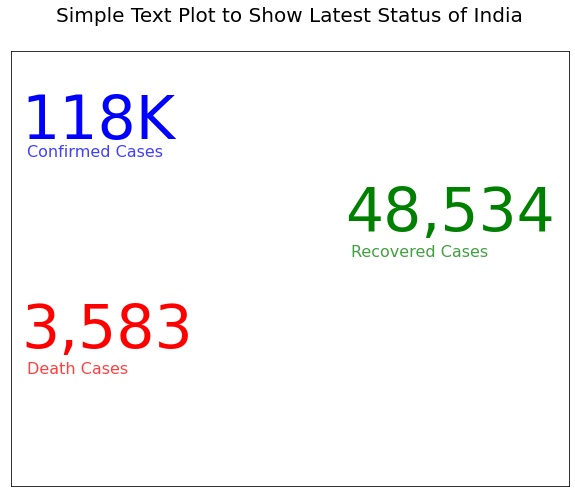

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.text(0.02,0.8,'118K',c='blue',fontsize=60)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 30 
plt.text(0.03,0.76,'Confirmed Cases',c='blue',fontsize=16,alpha=0.75)
plt.text(0.6,0.59,'48,534',c='green',fontsize=60)
plt.text(0.61,0.53,'Recovered Cases',c='green',fontsize=16,alpha=0.75)
plt.text(0.02,0.32,'3,583',c='red',fontsize=60)
plt.text(0.03,0.26,'Death Cases',c='red',fontsize=16,alpha=0.75)
g=plt.title('Simple Text Plot to Show Latest Status of India',fontsize=20)
g1=plt.xticks([])
g2=plt.yticks([])

Since the dataset provided had record until 18th May, the **latest data** were missing. So the latest data was googled as of **22nd May, 2020** midnight and in the above Text Plot.